In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [157]:
data = pd.read_csv("countryriskdata.csv",header=0)  # 不知道是否是原数据的问题，结果有所不同
# 后面的随机数是固定的，按道理应该是一样的结果

In [146]:
data.head()

,Country,Abbrev,Corruption,Peace,Legal,GDP Growth
0,Albania,AL,39,1.867,3.822,3.403
1,Algeria,DZ,34,2.213,4.160,4.202
2,Argentina,AR,36,1.957,4.568,-2.298
3,Armenia,AM,33,2.218,4.126,0.208
4,Australia,AU,79,1.465,8.244,2.471


In [104]:
# 描述性统计，Corruption越高腐败程度越低，Peace越低越和平，Legal越高法律风险越低，GDP Growth越高经济情况越好

data.describe()

,Corruption,Peace,Legal,GDP Growth
count,122.000000,122.000000,122.000000,122.000000
mean,46.237705,2.003730,5.599328,2.372566
std,19.126397,0.447826,1.486514,3.241424
min,14.000000,1.192000,2.728000,-18.000000
25%,31.250000,1.684750,4.571750,1.432250
50%,40.000000,1.969000,5.274000,2.496000
75%,58.750000,2.280500,6.476750,4.080000
max,90.000000,3.399000,8.633000,7.958000


In [105]:
# 相关系数,Corruption和Legal相关性较强

data[['Corruption','Peace','Legal','GDP Growth']].corr()

,Corruption,Peace,Legal,GDP Growth
Corruption,1.000000,-0.700477,0.923611,0.102513
Peace,-0.700477,1.000000,-0.651861,-0.199855
Legal,0.923611,-0.651861,1.000000,0.121516
GDP Growth,0.102513,-0.199855,0.121516,1.000000


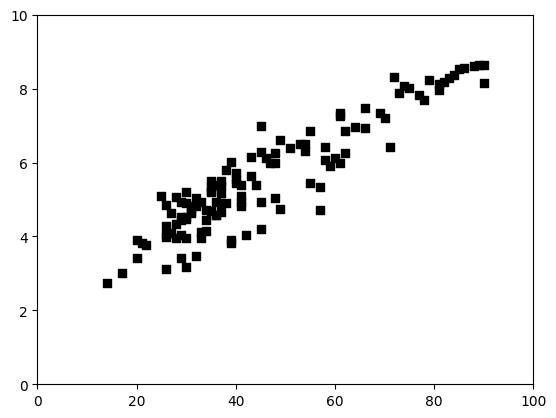

In [147]:
plt.scatter(data['Corruption'],data['Legal'],marker="s",color="k")
plt.xlim((0,100))
plt.ylim((0,10))
plt.show()

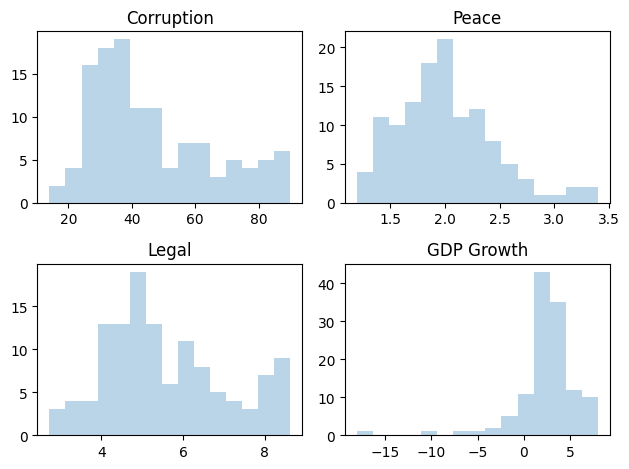

In [111]:
# 数据的图形展示

bins = 15
alpha = 0.3

plt.subplot(221)
plt.hist(data['Corruption'],bins = bins,alpha=alpha)
plt.title("Corruption")

plt.subplot(222)
plt.hist(data['Peace'],bins = bins,alpha=alpha)
plt.title("Peace")

plt.subplot(223)
plt.hist(data['Legal'],bins = bins,alpha=alpha)
plt.title("Legal")

plt.subplot(224)
plt.hist(data['GDP Growth'],bins = bins,alpha=alpha)
plt.title("GDP Growth")

plt.tight_layout()  # 使图形布局更合理
plt.show()

In [148]:
# 对数据进行标准化，因为Corruption和Legal相关性较强，故只研究其中之一

X = data[['Peace','Legal','GDP Growth']]
X = (X-X.mean())/X.std()  # 默认跨列进行计算

In [113]:
X

,Peace,Legal,GDP Growth
0,-0.305319,-1.195635,0.317896
1,0.467304,-0.968257,0.564392
2,-0.104348,-0.693790,-1.440899
3,0.478469,-0.991130,-0.667782
4,-1.202990,1.779110,0.030368
...,...,...,...
117,1.445363,-1.710262,-6.285067
118,-0.218231,-0.450267,1.184182
119,3.115656,-1.931585,-3.748836
120,-0.492892,-0.459012,0.183387


In [149]:
# elbow approach,KMeans(i),i表示分群的数量

x = range(1,10)
inertia = [KMeans(i).fit(X).inertia_ for i in x]

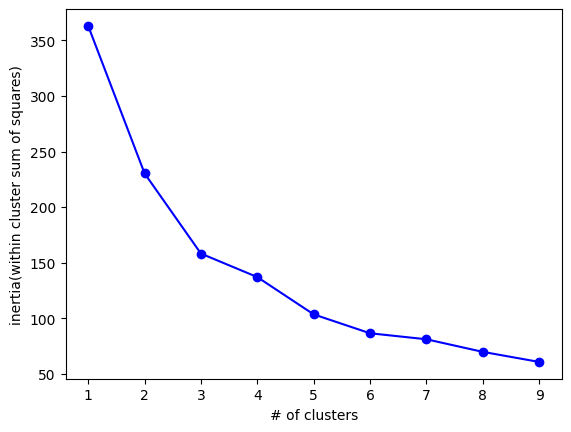

In [150]:
plt.plot(x,inertia,'-bo')
plt.xlabel("# of clusters")
plt.ylabel("inertia(within cluster sum of squares)")
plt.show()

分三群，因为再往后下降梯度较小

In [153]:
k = 3
kmeans = KMeans(k,random_state=0)
kmeans.fit(X)

print("--------------inertia--------------")
print('{:.2f}'.format(kmeans.inertia_))

print("---------------聚类点---------------")
# Peace越低越和平，Legal越高法律风险越低，GDP Growth越高经济情况越好
# [-0.92810589  1.16641329 -0.01445833] 最好
# [ 1.21562552 -1.01677118 -1.61496953] 最差
print(kmeans.cluster_centers_)

print("-------------点分配的标签-------------")
print(kmeans.labels_)

--------------inertia--------------
157.55
---------------聚类点---------------
[[ 0.25320926 -0.45186802  0.43127408]
 [-0.92810589  1.16641329 -0.01445833]
 [ 1.21562552 -1.01677118 -1.61496953]]
-------------点分配的标签-------------
[0 0 2 2 1 1 2 0 0 1 0 0 0 1 2 0 2 0 1 2 1 0 0 1 0 0 1 2 1 0 2 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 2 2 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 1 0 2 1 0 0 0 0 0 0 1 1 1 0 2 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 2 0 0
 0 2 1 1 1 1 2 0 2 0 2]


3D plot 略过（不太直观）

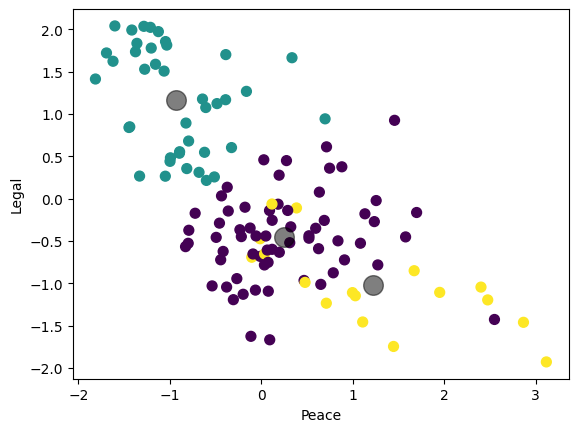

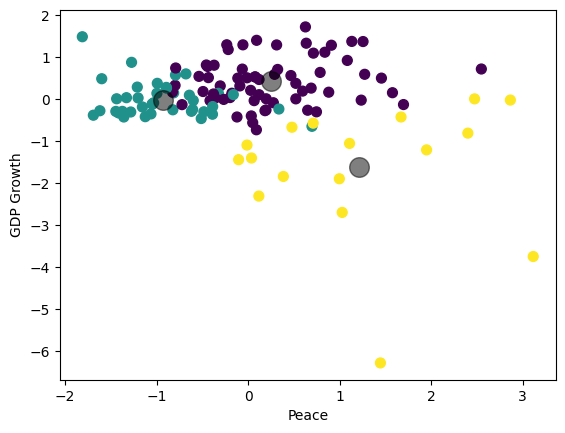

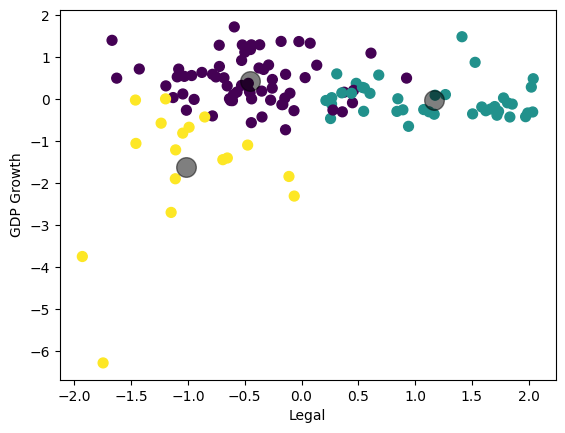

In [154]:
# 画两两之间的散点图

centers = kmeans.cluster_centers_
y = kmeans.labels_
combine = [[0,1],[0,2],[1,2]]
labels = ['Peace','Legal','GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,combine[i][0]],X.iloc[:,combine[i][1]],c=y,s=50)
    plt.scatter(centers[:,combine[i][0]],centers[:,combine[i][1]],c="k",s=200,alpha=0.5)
    plt.xlabel(labels[combine[i][0]])
    plt.ylabel(labels[combine[i][1]])

plt.show()

略过标签标注

In [155]:
# 对标注的国家进行排序(和老师结果的排序有所不同，展示顺序问题，结果没问题)

result = pd.DataFrame({'Country':data['Country'], 'Abbrev':data['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values("Label"))

                          Country Abbrev  Label
0                         Albania     AL      0
69                         Mexico     MX      0
67                     Mauritania     MR      0
66                           Mali     ML      0
64                         Malawi     MW      0
63                     Madagascar     MG      0
111                        Uganda     UG      0
120                        Zambia     ZM      0
59                         Latvia     LV      0
58                         Kuwait     KW      0
56                          Kenya     KE      0
55                     Kazakhstan     KZ      0
54                         Jordan     JO      0
106                      Thailand     TJ      0
52                        Jamaica     JM      0
50                         Israel     IL      0
48                           Iran     ID      0
47                      Indonesia     ID      0
70                        Moldova     FM      0
71                     Montenegro     ME

In [156]:
# Silhouette Analysis,分三群时Silhouette值最高
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    print("For n_clusters=", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters= 2 The average silhouette_score is : 0.3630420703158315
For n_clusters= 3 The average silhouette_score is : 0.3795529782813242
For n_clusters= 4 The average silhouette_score is : 0.33752120165317406
For n_clusters= 5 The average silhouette_score is : 0.30230001807842277
For n_clusters= 6 The average silhouette_score is : 0.3226115784298501
For n_clusters= 7 The average silhouette_score is : 0.30961493664746137
For n_clusters= 8 The average silhouette_score is : 0.31847526160984496
For n_clusters= 9 The average silhouette_score is : 0.27394586982677227
For n_clusters= 10 The average silhouette_score is : 0.27971232955781705


In [204]:
# PCA实现数据降维，例子1：daily interest rate changes

ir = pd.read_csv("interestrate.csv",header = 0,index_col=0)
ir

,1yr,2yr,3yr,4yr,5yr,7yr,10yr,30yr
2000/7/3,7.10,7.16,7.17,7.17,7.17,7.20,7.24,7.24
2000/7/5,7.03,7.06,7.07,7.07,7.08,7.11,7.14,7.16
2000/7/6,7.07,7.13,7.14,7.15,7.16,7.19,7.21,7.21
2000/7/7,7.01,7.04,7.06,7.06,7.07,7.10,7.14,7.14
2000/7/10,7.04,7.09,7.11,7.13,7.14,7.17,7.20,7.19
...,...,...,...,...,...,...,...,...
2011/8/8,0.39,0.50,0.73,1.05,1.41,2.01,2.58,3.44
2011/8/9,0.42,0.54,0.79,1.13,1.48,2.06,2.60,3.41
2011/8/10,0.39,0.42,0.58,0.88,1.22,1.80,2.37,3.25
2011/8/11,0.44,0.46,0.62,0.93,1.25,1.83,2.38,3.26


In [205]:
ir = ir.diff()*100
ir.dropna(inplace=True)

In [206]:
ir

,1yr,2yr,3yr,4yr,5yr,7yr,10yr,30yr
2000/7/5,-7.0,-10.0,-10.0,-10.0,-9.0,-9.0,-10.0,-8.0
2000/7/6,4.0,7.0,7.0,8.0,8.0,8.0,7.0,5.0
2000/7/7,-6.0,-9.0,-8.0,-9.0,-9.0,-9.0,-7.0,-7.0
2000/7/10,3.0,5.0,5.0,7.0,7.0,7.0,6.0,5.0
2000/7/11,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...
2011/8/8,-1.0,-5.0,-5.0,-6.0,-7.0,-7.0,-6.0,-6.0
2011/8/9,3.0,4.0,6.0,8.0,7.0,5.0,2.0,-3.0
2011/8/10,-3.0,-12.0,-21.0,-25.0,-26.0,-26.0,-23.0,-16.0
2011/8/11,5.0,4.0,4.0,5.0,3.0,3.0,1.0,1.0


In [207]:
ir.cov()  #求协方差矩阵

,1yr,2yr,3yr,4yr,5yr,7yr,10yr,30yr
1yr,22.159435,26.810911,27.038902,26.486332,25.916196,23.694338,21.090825,15.213691
2yr,26.810911,38.486502,40.555035,40.797660,40.641872,38.003205,34.664307,26.172043
3yr,27.038902,40.555035,44.895681,45.826158,46.203426,43.901229,40.627384,31.460365
4yr,26.486332,40.797660,45.826158,48.146376,48.932803,47.107714,44.234667,34.898831
5yr,25.916196,40.641872,46.203426,48.932803,51.393667,49.494892,46.684594,37.302272
7yr,23.694338,38.003205,43.901229,47.107714,49.494892,49.215207,47.246468,38.752949
10yr,21.090825,34.664307,40.627384,44.234667,46.684594,47.246468,47.216127,39.743891
30yr,15.213691,26.172043,31.460365,34.898831,37.302272,38.752949,39.743891,37.427843


In [208]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(ir)

PCA()

In [209]:
# 主成分系数矩阵,第二列及后四列数据正负号不同？

coff = pd.DataFrame(pca.components_).T
coff.round(3)

,0,1,2,3,4,5,6,7
0,0.216,-0.501,0.627,0.487,-0.122,-0.237,0.011,0.034
1,0.331,-0.429,0.129,-0.354,0.212,0.674,-0.100,-0.236
2,0.372,-0.267,-0.157,-0.414,0.096,-0.311,0.413,0.564
3,0.392,-0.110,-0.256,-0.174,0.019,-0.551,-0.416,-0.512
4,0.404,0.019,-0.355,0.269,-0.595,0.278,-0.316,0.327
5,0.394,0.194,-0.195,0.336,-0.007,0.100,0.685,-0.422
6,0.376,0.371,0.068,0.305,0.684,0.039,-0.278,0.279
7,0.305,0.554,0.575,-0.398,-0.331,-0.022,0.007,-0.032


In [210]:
# 特征值

eigen = pd.DataFrame(pca.explained_variance_)
np.sqrt(eigen).round(2)

,0
0,17.56
1,4.77
2,2.08
3,1.29
4,0.91
5,0.73
6,0.56
7,0.53


In [211]:
# 方差解释率

vari = pd.DataFrame(pca.explained_variance_ratio_)
vari.round(3)

,0
0,0.909
1,0.067
2,0.013
3,0.005
4,0.002
5,0.002
6,0.001
7,0.001


In [190]:
# PCA实现数据降维，例子1：country risk

data

,Country,Abbrev,Corruption,Peace,Legal,GDP Growth
0,Albania,AL,39,1.867,3.822,3.403
1,Algeria,DZ,34,2.213,4.160,4.202
2,Argentina,AR,36,1.957,4.568,-2.298
3,Armenia,AM,33,2.218,4.126,0.208
4,Australia,AU,79,1.465,8.244,2.471
...,...,...,...,...,...,...
117,Venezuela,VE,17,2.651,3.000,-18.000
118,Vietnam,VI,33,1.906,4.930,6.211
119,Yemen,YE,14,3.399,2.728,-9.779
120,Zambia,ZM,38,1.783,4.917,2.967


In [191]:
cr = data[['Corruption','Peace','Legal','GDP Growth']]
cr = (cr-cr.mean())/cr.std()  # 默认跨列进行计算

In [192]:
pca = PCA()
pca.fit(cr)

PCA()

In [193]:
# 主成分系数矩阵,第二列及后四列数据正负号不同？

coff_cr = pd.DataFrame(pca.components_).T
coff_cr.round(3)

,0,1,2,3
0,0.594,-0.155,0.292,0.733
1,-0.530,-0.040,0.842,0.086
2,0.585,-0.135,0.431,-0.674
3,0.153,0.978,0.140,0.027


In [196]:
# 特征值

eigen_cr = pd.DataFrame(pca.explained_variance_)
np.sqrt(eigen_cr).round(3)

,0
0,1.600
1,0.987
2,0.625
3,0.270


In [203]:
# 方差解释率

vari_cr = pd.DataFrame(pca.explained_variance_ratio_)
(vari_cr*100).round(0)

,0
0,64.0
1,24.0
2,10.0
3,2.0
